In [1]:
#pip install plotly==4.14.1

In [2]:
#pip install kneed

In [3]:
#pip install seaborn==0.11.1

In [4]:
from Dataset.Dataset import CSVLoader, NumpyDataset
from compoundFeaturization.rdkitFingerprints import MorganFingerprint
from featureSelection.baseFeatureSelector import LowVarianceFS
from unsupervised.baseUnsupervised import PCA, TSNE, KMeans

In [5]:
dataset = CSVLoader('preprocessed_dataset_wfoodb.csv', 'Smiles', ['Class'], 'ID')#, chunk_size=2000)
print(dataset.get_shape())

(23290,) (23290,) (0,) (23290,)
((23290,), (23290,), (0,), (23290,))


In [6]:
#Featurization
dataset = MorganFingerprint().featurize(dataset)
dataset.get_shape()

Featurizing datapoint 0
Featurizing datapoint 1000
Featurizing datapoint 2000
Featurizing datapoint 3000
Featurizing datapoint 4000
Featurizing datapoint 5000
Featurizing datapoint 6000


RDKit ERROR: [12:02:49] Explicit valence for atom # 1 Cl, 4, is greater than permitted


error in smile: O=[Cl]=O
Featurizing datapoint 7000


RDKit ERROR: [12:02:52] Explicit valence for atom # 3 B, 4, is greater than permitted
RDKit ERROR: [12:02:52] Explicit valence for atom # 1 Cl, 9, is greater than permitted


error in smile: OB1O[B]2(O)OB(O)O[B](O)(O1)O2
error in smile: O=[Cl-](=O)(=O)=O
Featurizing datapoint 8000
Featurizing datapoint 9000
Featurizing datapoint 10000
Featurizing datapoint 11000
Featurizing datapoint 12000
Featurizing datapoint 13000
Featurizing datapoint 14000


RDKit ERROR: [12:03:08] Explicit valence for atom # 0 P, 11, is greater than permitted


error in smile: [P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C
Featurizing datapoint 15000
Featurizing datapoint 16000
Featurizing datapoint 17000
Featurizing datapoint 18000
Featurizing datapoint 19000
Featurizing datapoint 20000
Featurizing datapoint 21000
Featurizing datapoint 22000
Featurizing datapoint 23000
Elements with indexes:  [6257, 7708, 7709, 14244]  were removed due to the presence of NAs!
The elements in question are:  ['O=[Cl]=O' 'OB1O[B]2(O)OB(O)O[B](O)(O1)O2' 'O=[Cl-](=O)(=O)=O'
 '[P](OCC=C(C)C)(OCC=C(C)C)(=O)(OP(OCC=C(C)C)(OCC=C(C)C)=O)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)(CC=C(C)C)CC=C(C)C']
(23286,) (23286,) (23286, 1024) (23286,)


((23286,), (23286,), (23286, 1024), (23286,))

In [7]:
#PCA
#dataset = PCA(n_components=5).runUnsupervised(dataset)

#print(dataset.get_shape())

In [8]:
#TSNE
#dataset = TSNE(n_components=3).runUnsupervised(dataset)

#print(dataset.get_shape())

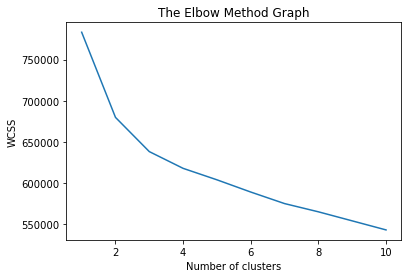

Creating a K-means cluster with 3 clusters...
Reduce the number of features to less than ten to get plot interpretability!


In [9]:
#KMeans
kmeans= KMeans().runUnsupervised(dataset)